In [116]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')


In [117]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combi = [train_data, test_data]

data_attributes = train_data.columns.values
data_attributes

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [118]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [120]:
train_data.info()
print('#' * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger


parch - Number of Parents/Children Aboard

sibsp - Number of Siblings/Spouses Aboard

fare - preis

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

38% Habens überlebt

891 einträge ~ 40% von dem gesamten passagieren an bord (2,224)

es waren eher junge Menschen an Bord

in den Daten sind es 577 Männer ggü 314 Frauen (<30% frauen)



In [121]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:

train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [123]:
# Rule of Thumb
"""
2/3 of first class survive
half of 2nd class survives
"""
first_rule = []
x = train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()
for e in x['Survived']:
    first_rule.append(e)
first_rule


[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]

In [124]:
def rule1(data):
    if data == 1:
        return 1
    elif data == 2:
        return int(np.round(random.random()))
    elif data == 3:
        return 0

In [125]:
rule1(2)

0

In [126]:
train_data[["Sex", "Survived"]].groupby(
    ['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [127]:
# Rule of Thumb 2 
"""
3/4 of the women on Board survive
"""
second_rule = []
y = train_data[["Sex", "Survived"]].groupby(["Sex"]).mean()
for e in y['Survived']:
    second_rule.append(e)
second_rule


[0.7420382165605095, 0.18890814558058924]

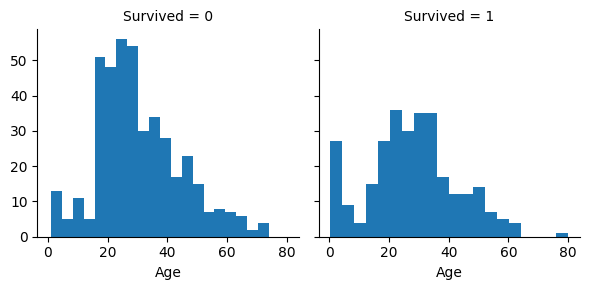

In [128]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)


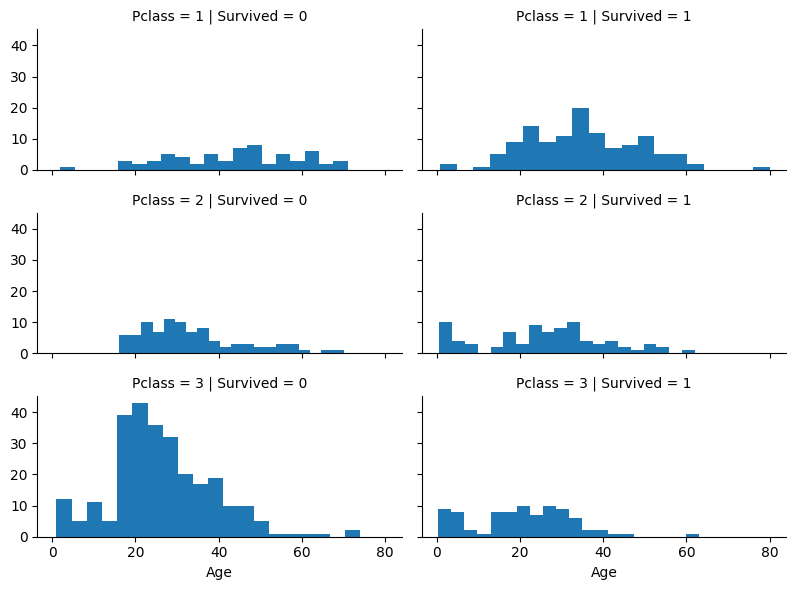

In [129]:
grid = sns.FacetGrid(train_data, col='Survived',
                     row='Pclass', height=2, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()


In [130]:
for dataset in combi:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [131]:
for dataset in combi:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [132]:
#Name und PassengerId, Ticket,Cabin werden nicht gebraucht, also droppen wr diese
train_data = train_data.drop(['Name', 'PassengerId','Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
combi = [train_data, test_data]
train_data.shape, test_data.shape


((891, 9), (418, 9))

In [133]:
test_data.head()



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [134]:
 #Sex und Titel sollten als Zahl vorliegen
Title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#for data in train_data:
#   data['Sex'] = data['Sex'].map({'female': 1, 'male': 0}).astype(int)
    #e['Title'] = e['Title'].map(Title_map).astype(int)
    #e['Title'] = e['Title'].fillna(0)
train_data = train_data.drop(
    ['Title', 'Embarked', 'SibSp', 'Parch', 'Fare'], axis=1)


test_data = test_data.drop(
    ['Title', 'Embarked', 'SibSp', 'Parch', 'Fare'], axis=1)


In [135]:
#train_data = pd.get_dummies(train_data['Sex'])


train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)


In [136]:
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [137]:
test_data.head()


,PassengerId,Pclass,Sex,Age
0,892,3,0,34.5
1,893,3,1,47.0
2,894,2,0,62.0
3,895,3,0,27.0
4,896,3,1,22.0


In [138]:
# Da manche Einträge fehlen müssen wir diese passend auffüllen

train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)


In [139]:
# TrainingsModell
#test_data.drop(["Sex", "Age"], axis=1)

X_train = train_data["Pclass"]
Y_train = train_data["Survived"]

X_test = test_data["Pclass"]
X_train.shape, Y_train.shape, X_test.shape


((891,), (891,), (418,))

In [140]:
X_test.head()


0    3
1    3
2    2
3    3
4    3
Name: Pclass, dtype: int64

In [141]:
#X_train.head()

X_test = np.asarray(X_test).reshape(-1, 1)
X_train = np.asarray(X_train).reshape(-1, 1)
lol = []
for e in X_test:
    e = lol.append(rule1(e))



In [142]:
# Regression

reg = LogisticRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print(f' score : {reg.score(X_train, Y_train) }')
print(f' acc_score (normalized): {accuracy_score(X_train, Y_train, normalize=True)}')
print(f' acc_score : {accuracy_score(X_train, Y_train, normalize=False)}')
#print(lol, Y_pred)


 score : 0.6790123456790124
 acc_score (normalized): 0.1526374859708193
 acc_score : 136


In [143]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
print(f' score : {random_forest.score(X_train, Y_train) }')



 score : 0.6790123456790124


In [144]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
print(f' score : {decision_tree.score(X_train, Y_train) }')



 score : 0.6790123456790124


In [145]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    train_data["Pclass"], train_data["Survived"], test_size=1, random_state=42)

X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape


((890,), (1,), (890,), (1,))